# Data Structured

## An Array of Sequences

### Container Sequences:
    - list, tuple, collections.deque
### Flat Sequences:
    - str, bytes, bytearray, memoryview, array.array
    
Flat sequences are more compact, but they are limited to holding primitive values like characters, bytes and numbers.

### Mutable sequences:
    - list, bytearray, array.array, collections.deque and memoryview
### Immutable sequences:
    - tuple, str and bytes

# List comprehension and Readability

### Building a list of Unicode codepoints from a string
symbols = '$¢£¥€¤'
codes = []
for symbol in symbols:
    codes.append(ord(symbol))
codes

In [25]:
# Do the same code above with list comprehensions
symbols = '$¢£¥€¤'
my_codes = [ord(symbol) for symbol in symbols]
assert my_codes == my_codes

### Values inside list comprehensions don't leak

In [22]:
x = 'ABC'
dummy = [ord(x) for x in x]
print(x, dummy)

ABC [65, 66, 67]


### Listcomp vs map+filter

In [26]:
symbols = '$¢£¥€¤'

beyond_ascii_c = [ord(s) for s in symbols if ord(s) > 127]
beyond_ascii_f = list(filter(lambda c: c > 127, map(ord, symbols)))

assert beyond_ascii_c == beyond_ascii_f

## Cartesian Products

### List comprehensions are an easy way to _hardcode_ a cartesian product between two or more iterables (and impress your recruiter). Of course there should be native libraries to do this, but doesn't hurt to learn the _raw way_.

### Let's produce a list of T-shirts available in two colors and three sizes.

In [18]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes]
print(tshirts)

[('black', 'S'), ('black', 'M'), ('black', 'L'), ('white', 'S'), ('white', 'M'), ('white', 'L')]


In [19]:
# That's equivalent to good ol' for-loop below
tshirts2 = []
for color in colors:
    for size in sizes:
        tshirts2.append((color, size))
print(tshirts2)

[('black', 'S'), ('black', 'M'), ('black', 'L'), ('white', 'S'), ('white', 'M'), ('white', 'L')]


In [20]:
# Liscomps can also be done like that
tshirts3 = [(color, size) for color in colors
                         for size in sizes]
print(tshirts3)
assert tshirts == tshirts2 == tshirts3

[('black', 'S'), ('black', 'M'), ('black', 'L'), ('white', 'S'), ('white', 'M'), ('white', 'L')]


## What are generators?
### A genexp saves memory because it yields items one by one using the iterator protocol

In [30]:
minha_lista = [x for x in range(1,100) if x % 2 == 0]
# print(minha_lista)

minha_gen = (x for x in range(1,100) if x % 2 == 0)
# print(list(minha_gen))

import sys
print(sys.getsizeof(minha_lista))
print(sys.getsizeof(list(minha_gen)))

536
480


In [36]:
# Showing how lists expand size
l = [1, 2, 3]
from sys import getsizeof as gsf
print(gsf(l))
l.append(100)
l.append(300)
print(gsf(l))
l.append(300)
print(gsf(l))
l.append(300)
print(gsf(l))
l.append(300)
print(gsf(l))

96
128
128
128
168


In [42]:
# generator expressions
def generator_da_carla():
    n = 1
    print("Essa  uma funcao Generator")
    print(n)
    yield n

    n += 1
    print(n)
    yield n

    n += 1
    print(n)
    yield n


a = generator_da_carla()

next(a)
# 1

next(a)
# 2

next(a)
# 3

next(a)
# StopIteration - ERROR

Essa  uma funcao Generator
1
2
3


StopIteration: 

In [41]:
# Another example
l = filter(lambda x: x % 2 == 1, range(3,16))
for i in l:
    print(i)

# do another stuff
for i in l:
    print(i)

3
5
7
9
11
13
15


In [52]:
# Creating a generator
def seq_gen(start, end, step=1):
    n = start
    while n <= end:
        yield n
        n += step
    
assert list(seq_gen(1,10)) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### É muito simples criar uma função Generator, mas existem algumas peculiaridades. Por exemplo, nós usamos a declaração `yield` ao invés de `return`. Se a função contém ao menos uma declaração `yield` então ela se torna uma função Generator.

* O `yield` pode ser lido como um pause, que retorna um objeto do tipo generator.
* O objeto Generator só pode ser iterado uma única vez.

## Generator Expressions
`genexpr = (expression for item in collection)`

In [61]:
def generator():
    for item in collection:
        yield expression

In [67]:
t = tuple(n for n in range(10))
print(t)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)


In [82]:
# Tuples are immutable
t[1] = -1

TypeError: 'tuple' object does not support item assignment

In [83]:
from array import array
a = array('i', (n for n in range(10)))
print(a)

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


# Tuples

### Can be used as immutable lists or records with no field names

### Tuples as records

In [85]:
julia = ("Julia", "Roberts", 1967, "Duplicity", 2009, "Actress", "Atlanta, Georgia")

### Unpacking and assignment

In [95]:
def foo():
    return 'Alan', 'Souza'

first_name, surname = foo()
assert first_name == 'Alan'
assert surname == 'Souza'

In [96]:
name, surname, b_year, movie, m_year, profession, b_place = julia

In [97]:
assert name == 'Julia'
assert surname == 'Roberts'
assert b_year == 1967
assert profession == 'Actress'
assert b_place == 'Atlanta, Georgia'

### Swapping variable values without a temporary value

In [99]:
a = 2
b = 3
a, b = b, a

assert a == 3
assert b == 2

### Grabbing filename

In [103]:
import os
_, filename = os.path.split('$HOME/.ssh/id_rsa.pub')
filename

'id_rsa.pub'

### Unpacking using star `*`

In [104]:
surname

'Roberts'

In [105]:
my_tuple = ('Rafael', 'Tobby')

In [113]:
def passear(dono, cachorro):
    return "{} levou seu querido cachorro {} para passear".format(dono, cachorro)

In [124]:
passear(my_tuple)

TypeError: passear() missing 1 required positional argument: 'cachorro'

In [123]:
passear(*my_tuple)

'Rafael levou seu querido cachorro Tobby para passear'

### Grabbing the excess items

In [133]:
a, b, *rest = range(1, 6)
assert rest == [3, 4, 5]

In [136]:
# can also be applied in the beggining of variables
*head, b, c = range(5)
assert head == [0, 1, 2]

In [137]:
# and also be applied in middle
a, *body, c, d = range(6)
assert body == [1, 2, 3]

### Nested tuple unpacking

In [140]:
metro_areas = [
    ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
    ('Sao Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]
print('{:15} | {:^9} | {:^9}'.format('', 'lat.', 'long.'))
fmt = '{:15} | {:9.4f} | {:9.4f}'
for name, cc, pop, (latitude, longitude) in metro_areas:  
    if longitude <= 0:  
        print(fmt.format(name, latitude, longitude))

                |   lat.    |   long.  
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
Sao Paulo       |  -23.5478 |  -46.6358


### What if we want a tuple but also named fields?
### Then we shall use a `namedtuple`. The `collections.namedtuple` function is a factory that produces subclasses of tuple enhanced with field names and a class name—which helps debugging.
#### Instances of a class that you build with namedtuple take exactly the same amount of memory as tuples because the field names are stored in the class. They use less memory than a regular object because they don’t store attributes in a per-instance __dict__.

In [145]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates')
tokyo = City('Tokyo', 'JP', 36.933, (35.689722, 139.691667))
print(tokyo)

City(name='Tokyo', country='JP', population=36.933, coordinates=(35.689722, 139.691667))


In [160]:
assert tokyo.population == 36.933
assert tokyo.coordinates == (35.689722, 139.691667)
assert tokyo.population == 36.933
assert tokyo.name == 'Tokyo'

# Slicing

In [19]:
l = list(range(10))
# l
l[::-1]
print(l[2])
s = 'yara_oliveira'
s[5:]

2


'oliveira'

In [29]:
invoice = """
0.....6.................................40........52...55........
1909  Pimoroni PiBrella                     $17.50    3    $52.50
1489  6mm Tactile Switch x20                 $4.95    2     $9.90
1510  Panavise Jr. - PV-201                 $28.00    1    $28.00
"""


In [71]:
SKU = slice(0, 6)
DESCRIPTION = slice(6, 40)
UNIT_PRICE = slice(40, 52)
QUANTITY = slice(52, 55)
ITEM_TOTAL = slice(55, None)
line_items = invoice.split('\n')[2:]

In [70]:
for item in line_items:
    print(item[UNIT_PRICE], item[DESCRIPTION])

    $17.50   Pimoroni PiBrella                 
     $4.95   6mm Tactile Switch x20            
    $28.00   Panavise Jr. - PV-201             
 


# Multidimensional Slicing and Elipsis

In [6]:
def create_matrix(linha=2, coluna=2, valor=0):
    return [[valor for i in range(coluna)] for j in range(linha)]

matrix = create_matrix(3,4,10)
for line in matrix:
    print(line)

[10, 10, 10, 10]
[10, 10, 10, 10]
[10, 10, 10, 10]


In [65]:
matrix[0][-1] = 3
del matrix[0][-1]

## Assigning to Slices

In [14]:
my_list = list(range(10))
print( id(my_list[2:]), id(my_list) )
print( id(my_list) - id(my_list[2:]) )

4438644048 4440443632
1600


### Invert a list recursively using slice

In [17]:
def reverse(s): 
    if len(s) == 0: 
        return s 
    else: 
        return reverse(s[1:]) + s[0] 

initial = 'Python is awesome'
s = reverse(initial)
s

'emosewa si nohtyP'

### How does slice works under the covers?

In [23]:
carla = list(range(5))
import dis
dis.dis('carla[1:]')

  1           0 LOAD_NAME                0 (carla)
              2 LOAD_CONST               0 (1)
              4 LOAD_CONST               1 (None)
              6 BUILD_SLICE              2
              8 BINARY_SUBSCR
             10 RETURN_VALUE


### Some counter-intuitive slicing examples

In [60]:
l = list(range(10))
l[2:5] = [20, 30]
l # note that 4 is gone

[0, 1, 20, 30, 5, 6, 7, 8, 9]

In [61]:
del l[5:7]
l

[0, 1, 20, 30, 5, 8, 9]

In [62]:
l += [1]
l[3::2] = [11, 22, 33]
print(l)

[0, 1, 20, 11, 5, 22, 9, 33]


In [68]:
l[2:5] = [100]
l

[0, 1, 100]

## Using + and * with Sequences

In [105]:
l = [1, 2, 3]
_id = id(l)
l *= 5
_nid = id(l)

In [106]:
assert _id == _nid # *= and += operator behaves in-place

In [85]:
l = [1,2,3]
_id = id(l)
l = l * 5
_nid = id(l)

In [97]:
assert _id != _nid # the * and + operator in assignment behaves different

In [101]:
t = (1,2,3)
_id = id(t)
t *= 2
_nid = id(t)
print(t)

assert _id != _nid # because tuple are immutable

(1, 2, 3, 1, 2, 3)


In [103]:
s = 'Python Study Group'
_id = id(s)
s *= 2
_nid = id(t)
print(s)

assert _id != _nid # because strings are immutable

Python Study GroupPython Study Group


## PyTutor has an excellent code visualizer:
### - http://www.pythontutor.com/visualize.html

## Assignment Puzzle

In [109]:
t = (1, 2, [30, 40])
t[2] += [50, 60]

TypeError: 'tuple' object does not support item assignment

In [112]:
print(t) # 😱

(1, 2, [30, 40, 50, 60])


## Sorting sequences

In [126]:
my_list = [5, 6, 4, 7, 3, 1, 9]
sorted(my_list, reverse=True) # Creates a new list
my_list.sort(reverse=True) # Sorts the list "in-place"

assert id(my_list) != id(sorted(my_list))
assert my_list == sorted(my_list, reverse=True) # Now that lists are sorted. Also notes that Python does a "deep-comparison"

In [132]:
# Key parameter for sorting
l = [{'name': 'rafael', 'age': 27}, {'name': 'carla', 'age': 18}, {'name': 'Guilherme', 'age': 30}]
sorted(l, key=lambda d: d['age'])

[{'name': 'carla', 'age': 18},
 {'name': 'rafael', 'age': 27},
 {'name': 'Guilherme', 'age': 30}]

## Managing Ordered Sequences with bisect

In [23]:
import bisect

In [24]:
l = [0,1,2,4,5,6,7]

In [27]:
bisect.bisect_right(l, 3)

3

In [28]:
bisect.bisect_left(l, 3)

3

In [29]:
## When a List Is Not the Answer

In [31]:
from array import array

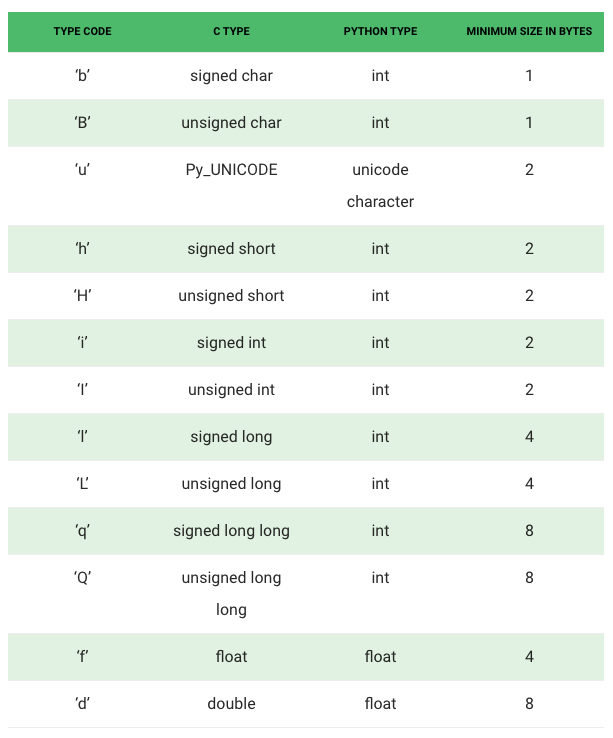

In [41]:
from random import random

In [42]:
floats = array('d', (random() for i in range(10**7)))

In [43]:
floats[-1]

0.2819844031017815

In [44]:
fp = open('floats.bin', 'wb')

In [45]:
floats.tofile(fp)

In [46]:
fp.close()

In [47]:
floats2 = array('d')

In [48]:
floats2

array('d')

In [49]:
fp = open('floats.bin', 'rb')
floats2.fromfile(fp, 10**7)
fp.close()

In [50]:
floats2[-1]

0.2819844031017815

In [51]:
assert floats2 == floats

## numpy

In [61]:
# todo: exercícios de numpy talvez?

In [55]:
import numpy

In [56]:
a = numpy.arange(12)

In [57]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [59]:
a.mean()

5.5

## Deques and Other Queues

In [62]:
from collections import deque

In [63]:
dq = deque(range(10), maxlen=10)

In [64]:
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [65]:
dq.append(5)

In [66]:
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 5])

In [68]:
dq.appendleft(0)

In [69]:
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
dq[1]

1